# Logistic Regression

## Table of Contents
1. [Introduction](#1-introduction)
2. [Theory & Mathematics](#2-theory--mathematics)
3. [Assumptions & Requirements](#3-assumptions--requirements)
4. [When to Use This Algorithm](#4-when-to-use-this-algorithm)
5. [Implementation from Scratch (NumPy)](#5-implementation-from-scratch-numpy)
6. [Implementation with Scikit-learn](#6-implementation-with-scikit-learn)
7. [Hyperparameter Tuning](#7-hyperparameter-tuning)
8. [Complete Hyperparameter Reference](#8-complete-hyperparameter-reference)
9. [Practical Tips & Common Pitfalls](#9-practical-tips--common-pitfalls)
10. [Real-world Example](#10-real-world-example)
11. [Comparison with Other Algorithms](#11-comparison-with-other-algorithms)
12. [References](#12-references)


---

## 1. Introduction

### What is Logistic Regression?

Despite its name, **Logistic Regression is a classification algorithm**, not a regression algorithm. It predicts the probability that an instance belongs to a particular class.

**Key characteristics:**
- **Supervised learning** for binary classification (can extend to multiclass)
- **Probabilistic** model - outputs probabilities between 0 and 1
- **Linear decision boundary** - separates classes with a straight line/hyperplane
- **Interpretable** - coefficients show feature importance

**Historical Context:**
- Developed in the 1940s-1950s for biological assays
- Named for the "logistic function" (sigmoid) it uses
- Widely used in medical, social sciences, and machine learning

**Main Use Cases:**
- Binary classification (yes/no, spam/not spam, fraud/legitimate)
- Probability estimation for decision-making
- Baseline model for classification tasks
- When you need class probabilities (not just predictions)

### Linear Regression vs Logistic Regression

| Aspect | Linear Regression | Logistic Regression |
|--------|-------------------|---------------------|
| **Task** | Regression | Classification |
| **Output** | Continuous value | Probability (0 to 1) |
| **Function** | Linear (y = wx + b) | Sigmoid (p = σ(wx + b)) |
| **Cost Function** | MSE | Cross-Entropy |
| **Use** | Predict prices, temperatures | Predict classes, probabilities |


---

## 2. Theory & Mathematics

### Core Concept

Logistic Regression models the probability that a sample belongs to class 1:

$$P(y=1|x) = \sigma(w^Tx + b) = \frac{1}{1 + e^{-(w^Tx + b)}}$$

Where:
- $\sigma(z)$ is the **sigmoid function** (logistic function)
- $w$ = weights/coefficients
- $b$ = bias/intercept
- $x$ = input features

### The Sigmoid Function

The sigmoid function maps any real number to a value between 0 and 1:

$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

**Properties:**
- Output range: (0, 1) - perfect for probabilities
- S-shaped curve
- $\sigma(0) = 0.5$ (decision boundary)
- $\sigma(z) \to 1$ as $z \to \infty$
- $\sigma(z) \to 0$ as $z \to -\infty$

### Decision Rule

Once we have probabilities, we classify:

$$\hat{y} = \begin{cases} 
1 & \text{if } P(y=1|x) \geq 0.5 \\
0 & \text{if } P(y=1|x) < 0.5
\end{cases}$$

The threshold 0.5 can be adjusted based on business needs.

### Cost Function: Binary Cross-Entropy

We can't use MSE (it's non-convex for logistic regression). Instead, we use **log loss**:

$$J(w) = -\frac{1}{n}\sum_{i=1}^{n}[y_i \log(\hat{p}_i) + (1-y_i)\log(1-\hat{p}_i)]$$

Where $\hat{p}_i = \sigma(w^Tx_i + b)$

**Intuition:**
- If $y=1$ and $\hat{p}=1$: loss = 0 (perfect)
- If $y=1$ and $\hat{p}=0$: loss = $\infty$ (terrible)
- If $y=0$ and $\hat{p}=0$: loss = 0 (perfect)
- If $y=0$ and $\hat{p}=1$: loss = $\infty$ (terrible)

### Optimization: Gradient Descent

Unlike Linear Regression, there's no closed-form solution. We use **gradient descent**:

1. Initialize weights randomly
2. Compute gradient: $\nabla J(w) = \frac{1}{n}X^T(\sigma(Xw) - y)$
3. Update weights: $w := w - \alpha \nabla J(w)$
4. Repeat until convergence

Where $\alpha$ is the learning rate.


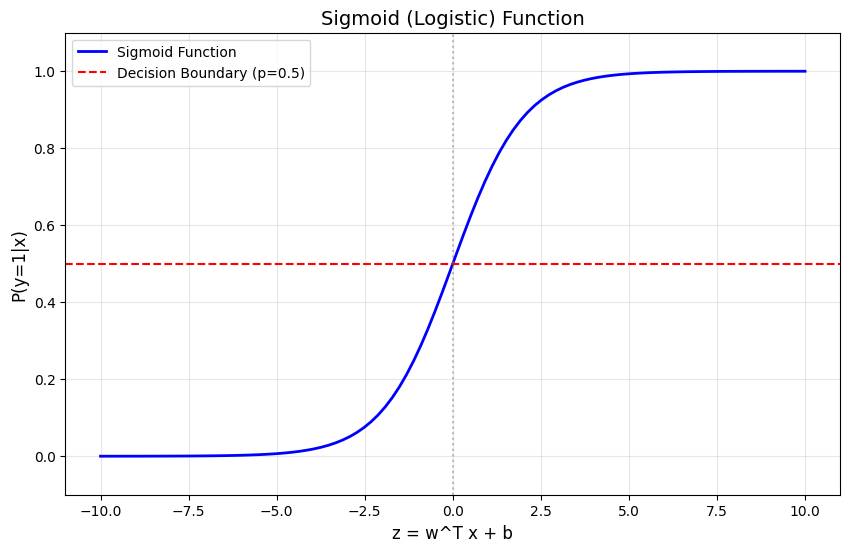

Key Points:
σ(-5) = 0.0067 → Class 0 (very confident)
σ(-1) = 0.2689 → Class 0
σ(0) = 0.5000 → Boundary
σ(1) = 0.7311 → Class 1
σ(5) = 0.9933 → Class 1 (very confident)


In [1]:
# Visualize the sigmoid function
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-10, 10, 100)
p = sigmoid(z)

plt.figure(figsize=(10, 6))
plt.plot(z, p, 'b-', linewidth=2, label='Sigmoid Function')
plt.axhline(y=0.5, color='r', linestyle='--', label='Decision Boundary (p=0.5)')
plt.axvline(x=0, color='gray', linestyle=':', alpha=0.5)
plt.xlabel('z = w^T x + b', fontsize=12)
plt.ylabel('P(y=1|x)', fontsize=12)
plt.title('Sigmoid (Logistic) Function', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend()
plt.ylim(-0.1, 1.1)
plt.show()

print("Key Points:")
print(f"σ(-5) = {sigmoid(-5):.4f} → Class 0 (very confident)")
print(f"σ(-1) = {sigmoid(-1):.4f} → Class 0")
print(f"σ(0) = {sigmoid(0):.4f} → Boundary")
print(f"σ(1) = {sigmoid(1):.4f} → Class 1")
print(f"σ(5) = {sigmoid(5):.4f} → Class 1 (very confident)")


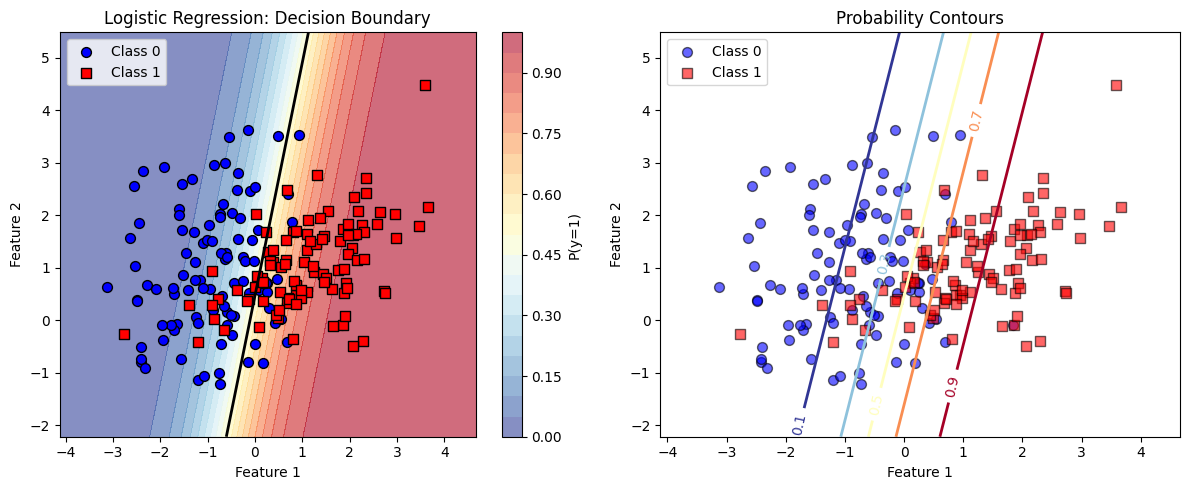

In [2]:
# Visualize decision boundary on 2D data
from sklearn.datasets import make_classification

# Generate binary classification data
X_demo, y_demo = make_classification(
    n_samples=200, n_features=2, n_redundant=0, n_informative=2,
    n_clusters_per_class=1, random_state=42
)

# Train logistic regression
from sklearn.linear_model import LogisticRegression
model_demo = LogisticRegression()
model_demo.fit(X_demo, y_demo)

# Create mesh for decision boundary
x_min, x_max = X_demo[:, 0].min() - 1, X_demo[:, 0].max() + 1
y_min, y_max = X_demo[:, 1].min() - 1, X_demo[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Predict probabilities on mesh
Z = model_demo.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(12, 5))

# Left: Decision boundary
plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z, levels=20, cmap='RdYlBu_r', alpha=0.6)
plt.colorbar(label='P(y=1)')
plt.scatter(X_demo[y_demo==0, 0], X_demo[y_demo==0, 1], 
           c='blue', marker='o', edgecolors='k', label='Class 0', s=50)
plt.scatter(X_demo[y_demo==1, 0], X_demo[y_demo==1, 1], 
           c='red', marker='s', edgecolors='k', label='Class 1', s=50)
plt.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=2)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression: Decision Boundary')
plt.legend()

# Right: Probability contours
plt.subplot(1, 2, 2)
contour = plt.contour(xx, yy, Z, levels=[0.1, 0.3, 0.5, 0.7, 0.9], 
                      cmap='RdYlBu_r', linewidths=2)
plt.clabel(contour, inline=True, fontsize=10)
plt.scatter(X_demo[y_demo==0, 0], X_demo[y_demo==0, 1], 
           c='blue', marker='o', edgecolors='k', label='Class 0', s=50, alpha=0.6)
plt.scatter(X_demo[y_demo==1, 0], X_demo[y_demo==1, 1], 
           c='red', marker='s', edgecolors='k', label='Class 1', s=50, alpha=0.6)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Probability Contours')
plt.legend()

plt.tight_layout()
plt.show()


---

## 3. Assumptions & Requirements

### Critical Assumptions

Logistic Regression has fewer and less strict assumptions than Linear Regression:

#### ✅ 1. **Binary Outcome** (for binary logistic regression)
- **Assumption**: Target variable has two categories (0 and 1)
- **Extension**: Can extend to multiclass with multinomial logistic regression
- **Violation**: Use different algorithms (e.g., multi-class classification)

#### ✅ 2. **Independence of Observations**
- **Assumption**: Each observation is independent
- **Test**: Same as Linear Regression (Durbin-Watson)
- **Violation**: Correlated observations lead to inflated confidence
- **Fix**: 
  - Use mixed-effects models
  - Cluster-robust standard errors
  - Account for temporal/spatial correlation

#### ✅ 3. **Linear Relationship with Log-Odds**
- **Assumption**: Features have linear relationship with **log-odds** (not probability)
- **Note**: This is NOT the same as linear relationship with probability
- **Test**: Box-Tidwell test
- **Fix**: 
  - Add polynomial terms
  - Transform features
  - Use non-linear classifiers

#### ✅ 4. **No Multicollinearity**
- **Assumption**: Features aren't highly correlated
- **Test**: VIF, correlation matrix
- **Fix**: Same as Linear Regression (remove features, use regularization)

#### ✅ 5. **Large Sample Size**
- **Assumption**: Need sufficient data for each class
- **Rule of Thumb**: At least 10-15 observations per feature
- **Minimum**: At least 50 samples per class for reliable estimates

### Key Differences from Linear Regression

| Assumption | Linear Regression | Logistic Regression |
|------------|-------------------|---------------------|
| **Normality of residuals** | Required | NOT required |
| **Homoscedasticity** | Required | NOT required |
| **Linear relationship** | With Y directly | With log-odds of Y |
| **Outcome type** | Continuous | Binary/Categorical |

### Data Requirements

- **Minimum samples**: ~50-100 per class
- **Balanced classes**: Not required but helps (can handle imbalance)
- **Missing values**: Must be handled
- **Outliers**: Less sensitive than Linear Regression (bounded output 0-1)
- **Feature scaling**: Helps gradient descent converge faster (not required but recommended)


---

## 4. When to Use This Algorithm

### ✅ Use Logistic Regression When:

1. **Binary Classification Task**
   - Yes/No decisions
   - Positive/Negative outcomes
   - 0/1 labels

2. **Need Probability Estimates**
   - Want to know "how confident" the prediction is
   - Need calibrated probabilities for decision-making
   - Risk assessment scenarios

3. **Interpretability is Critical**
   - Medical diagnosis (need to explain to doctors/patients)
   - Credit scoring (regulatory requirements)
   - Legal applications
   - Can interpret coefficients as log-odds ratios

4. **Linear Decision Boundary Works**
   - Classes are roughly linearly separable
   - Data inspection shows linear patterns

5. **Baseline Classification Model**
   - Quick first attempt before complex models
   - Benchmarking other algorithms
   - Small to medium datasets

6. **Limited Computational Resources**
   - Fast to train and predict
   - Works on limited hardware

### ❌ Avoid Logistic Regression When:

1. **Non-linear Decision Boundary**
   - Classes have complex, curved boundaries
   - XOR-like patterns
   - **Alternative**: SVM with RBF kernel, Decision Trees, Neural Networks

2. **Multiclass with Many Classes**
   - 10+ classes becomes computationally expensive
   - **Alternative**: Tree-based models, Neural Networks

3. **High-Dimensional with Many Features**
   - Thousands of features
   - **Alternative**: Use L1 regularization (Lasso), or dimensionality reduction first

4. **Perfect or Near-Perfect Separation**
   - Causes numerical instability (complete separation problem)
   - **Alternative**: Regularized logistic regression, or simpler rules

5. **Highly Imbalanced Data** (without adjustments)
   - 99:1 class ratio without special handling
   - **Fix**: Use class weights, SMOTE, or different algorithms

### Real-world Applications

#### 🏥 Healthcare
- Disease diagnosis (has disease: yes/no)
- Patient readmission prediction
- Treatment response prediction

#### 💳 Finance
- Credit default prediction
- Fraud detection
- Customer churn prediction

#### 📧 Marketing
- Email spam detection
- Click-through rate prediction
- Customer conversion prediction

#### 🔬 Science
- Experiment success/failure
- A/B testing analysis
- Clinical trial outcomes

#### 🎯 Other
- Quality control (pass/fail)
- Sentiment analysis (positive/negative)
- Recommendation (will like / won't like)


---

## 5. Implementation from Scratch (NumPy)

### Why Implement from Scratch?

1. **Deep Understanding**: See how gradient descent works
2. **Interview Prep**: Very common coding interview question
3. **Customization**: Modify for specific needs
4. **Educational Value**: Bridge theory to practice

Let's implement Logistic Regression using only NumPy with gradient descent.


In [3]:
# Import from our src package
import sys
sys.path.append('..')

from src.models.linear_models import LogisticRegressionScratch

# Generate binary classification data
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

np.random.seed(42)
X, y = make_classification(
    n_samples=500, n_features=5, n_informative=3, n_redundant=0,
    n_classes=2, random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("=" * 60)
print("LOGISTIC REGRESSION FROM SCRATCH")
print("=" * 60)
print(f"Training samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")
print(f"Features: {X_train.shape[1]}")
print(f"Class distribution: {np.bincount(y_train)}")

# Train our from-scratch model
model_scratch = LogisticRegressionScratch(
    learning_rate=0.1,
    max_iter=1000,
    tol=1e-4
)
model_scratch.fit(X_train, y_train)

# Make predictions
y_pred_train = model_scratch.predict(X_train)
y_pred_test = model_scratch.predict(X_test)
y_proba_test = model_scratch.predict_proba(X_test)

# Evaluate
train_acc = model_scratch.score(X_train, y_train)
test_acc = model_scratch.score(X_test, y_test)

print(f"\n🔍 Model Parameters:")
print(f"  Coefficients: {model_scratch.coef_}")
print(f"  Intercept: {model_scratch.intercept_:.4f}")

print(f"\n📊 Performance:")
print(f"  Training Accuracy: {train_acc:.2%}")
print(f"  Test Accuracy: {test_acc:.2%}")

print(f"\n🎯 Sample Predictions:")
for i in range(5):
    print(f"  True: {y_test[i]}, Predicted: {y_pred_test[i]}, " +
          f"Prob(Class=1): {y_proba_test[i, 1]:.3f}")


LOGISTIC REGRESSION FROM SCRATCH
Training samples: 400
Test samples: 100
Features: 5
Class distribution: [198 202]

🔍 Model Parameters:
  Coefficients: [-0.09215651  1.71447414 -0.06832646  0.46496807  0.33331121]
  Intercept: 0.0676

📊 Performance:
  Training Accuracy: 88.50%
  Test Accuracy: 88.00%

🎯 Sample Predictions:
  True: 0, Predicted: 0, Prob(Class=1): 0.284
  True: 1, Predicted: 1, Prob(Class=1): 0.906
  True: 1, Predicted: 1, Prob(Class=1): 0.960
  True: 1, Predicted: 1, Prob(Class=1): 0.922
  True: 0, Predicted: 0, Prob(Class=1): 0.205


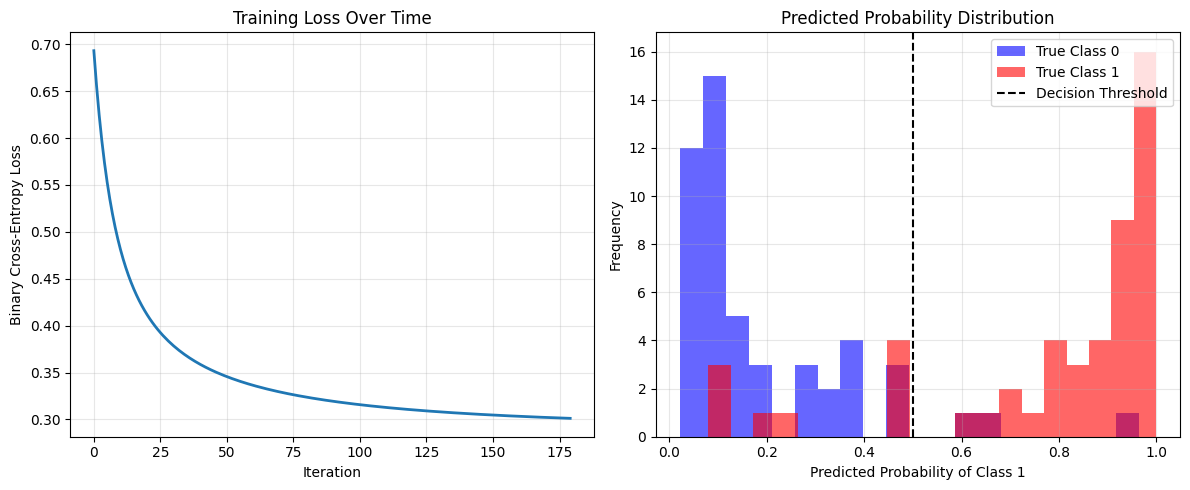


💡 Interpretation:
- Loss should decrease over iterations (converging)
- Good separation: Class 0 predictions cluster near 0, Class 1 near 1
- Overlapping histograms indicate misclassifications


In [4]:
# Visualize training progress
plt.figure(figsize=(12, 5))

# Loss curve
plt.subplot(1, 2, 1)
plt.plot(model_scratch.losses_, linewidth=2)
plt.xlabel('Iteration')
plt.ylabel('Binary Cross-Entropy Loss')
plt.title('Training Loss Over Time')
plt.grid(True, alpha=0.3)

# Predicted probabilities distribution
plt.subplot(1, 2, 2)
probs_class_0 = y_proba_test[y_test == 0, 1]
probs_class_1 = y_proba_test[y_test == 1, 1]

plt.hist(probs_class_0, bins=20, alpha=0.6, label='True Class 0', color='blue')
plt.hist(probs_class_1, bins=20, alpha=0.6, label='True Class 1', color='red')
plt.axvline(x=0.5, color='black', linestyle='--', label='Decision Threshold')
plt.xlabel('Predicted Probability of Class 1')
plt.ylabel('Frequency')
plt.title('Predicted Probability Distribution')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 Interpretation:")
print("- Loss should decrease over iterations (converging)")
print("- Good separation: Class 0 predictions cluster near 0, Class 1 near 1")
print("- Overlapping histograms indicate misclassifications")


---

## 6. Implementation with Scikit-learn

Now let's use the industry-standard scikit-learn library with comprehensive evaluation metrics.


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score, confusion_matrix, 
                             classification_report, roc_curve)
from sklearn.preprocessing import StandardScaler

print("=" * 60)
print("SCIKIT-LEARN LOGISTIC REGRESSION")
print("=" * 60)

# Feature scaling (recommended for gradient-based algorithms)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
sk_model = LogisticRegression(random_state=42, max_iter=1000)
sk_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_train_sk = sk_model.predict(X_train_scaled)
y_pred_test_sk = sk_model.predict(X_test_scaled)
y_proba_test_sk = sk_model.predict_proba(X_test_scaled)[:, 1]

# Calculate metrics
print(f"\n📊 Performance Metrics:")
print(f"  Accuracy:  {accuracy_score(y_test, y_pred_test_sk):.4f}")
print(f"  Precision: {precision_score(y_test, y_pred_test_sk):.4f}")
print(f"  Recall:    {recall_score(y_test, y_pred_test_sk):.4f}")
print(f"  F1-Score:  {f1_score(y_test, y_pred_test_sk):.4f}")
print(f"  ROC-AUC:   {roc_auc_score(y_test, y_proba_test_sk):.4f}")

print(f"\n📋 Classification Report:")
print(classification_report(y_test, y_pred_test_sk, 
                           target_names=['Class 0', 'Class 1']))

print(f"\n🔍 Model Parameters:")
print(f"  Intercept: {sk_model.intercept_[0]:.4f}")
print(f"  Coefficients: {sk_model.coef_[0]}")


SCIKIT-LEARN LOGISTIC REGRESSION

📊 Performance Metrics:
  Accuracy:  0.9000
  Precision: 0.9348
  Recall:    0.8600
  F1-Score:  0.8958
  ROC-AUC:   0.9332

📋 Classification Report:
              precision    recall  f1-score   support

     Class 0       0.87      0.94      0.90        50
     Class 1       0.93      0.86      0.90        50

    accuracy                           0.90       100
   macro avg       0.90      0.90      0.90       100
weighted avg       0.90      0.90      0.90       100


🔍 Model Parameters:
  Intercept: 0.3122
  Coefficients: [-0.1490753   2.7724737  -0.14736596  0.59996096  0.42097866]


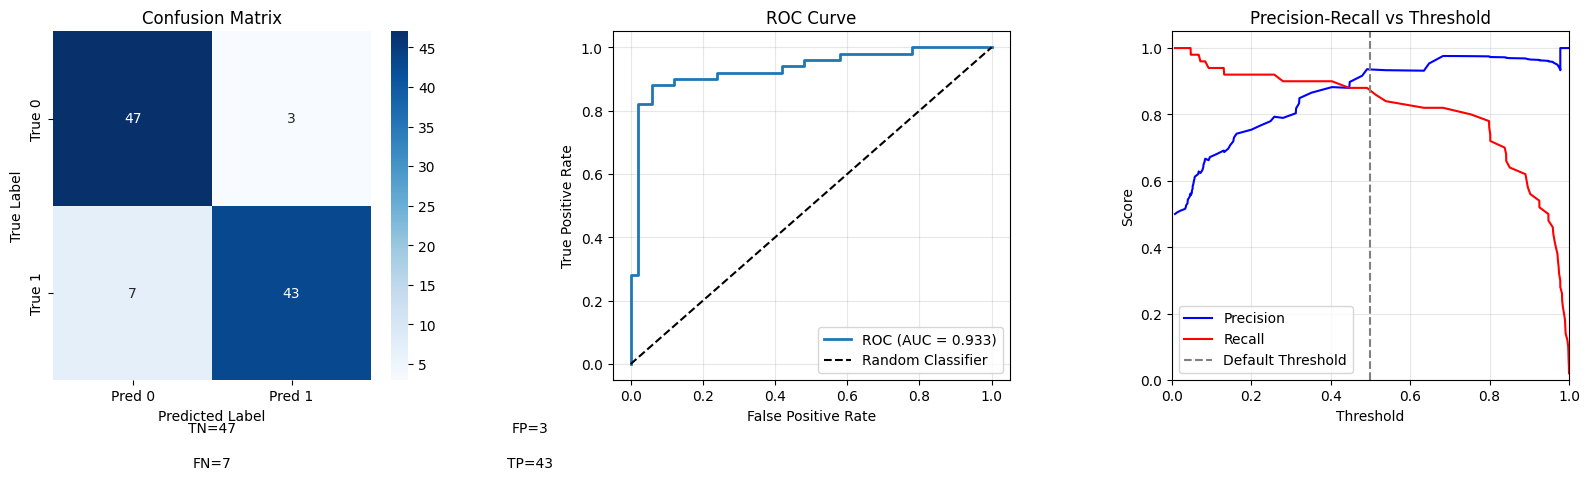


📖 Understanding the Metrics:
- Accuracy: Overall correctness
- Precision: Of predicted positives, how many are actually positive
- Recall: Of actual positives, how many did we catch
- F1-Score: Harmonic mean of precision and recall
- ROC-AUC: Area under ROC curve (1.0 = perfect, 0.5 = random)


In [6]:
# Confusion Matrix and ROC Curve
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# 1. Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test_sk)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Pred 0', 'Pred 1'],
            yticklabels=['True 0', 'True 1'])
axes[0].set_title('Confusion Matrix')
axes[0].set_ylabel('True Label')
axes[0].set_xlabel('Predicted Label')

# Add metrics on confusion matrix
tn, fp, fn, tp = cm.ravel()
axes[0].text(0.5, -0.15, f'TN={tn}', ha='center', transform=axes[0].transAxes)
axes[0].text(1.5, -0.15, f'FP={fp}', ha='center', transform=axes[0].transAxes)
axes[0].text(0.5, -0.25, f'FN={fn}', ha='center', transform=axes[0].transAxes)
axes[0].text(1.5, -0.25, f'TP={tp}', ha='center', transform=axes[0].transAxes)

# 2. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba_test_sk)
roc_auc = roc_auc_score(y_test, y_proba_test_sk)

axes[1].plot(fpr, tpr, linewidth=2, label=f'ROC (AUC = {roc_auc:.3f})')
axes[1].plot([0, 1], [0, 1], 'k--', label='Random Classifier')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# 3. Precision-Recall trade-off with threshold
from sklearn.metrics import precision_recall_curve
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_proba_test_sk)

axes[2].plot(pr_thresholds, precision[:-1], 'b-', label='Precision')
axes[2].plot(pr_thresholds, recall[:-1], 'r-', label='Recall')
axes[2].axvline(x=0.5, color='gray', linestyle='--', label='Default Threshold')
axes[2].set_xlabel('Threshold')
axes[2].set_ylabel('Score')
axes[2].set_title('Precision-Recall vs Threshold')
axes[2].legend()
axes[2].grid(True, alpha=0.3)
axes[2].set_xlim([0, 1])
axes[2].set_ylim([0, 1.05])

plt.tight_layout()
plt.show()

print("\n📖 Understanding the Metrics:")
print("- Accuracy: Overall correctness")
print("- Precision: Of predicted positives, how many are actually positive")
print("- Recall: Of actual positives, how many did we catch")
print("- F1-Score: Harmonic mean of precision and recall")
print("- ROC-AUC: Area under ROC curve (1.0 = perfect, 0.5 = random)")


---

## 7. Hyperparameter Tuning

Logistic Regression has several important hyperparameters, especially the regularization parameter `C` and the penalty type.


In [7]:
from sklearn.model_selection import GridSearchCV, cross_val_score
import pandas as pd

print("=" * 60)
print("HYPERPARAMETER TUNING")
print("=" * 60)

# Define parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # liblinear supports both l1 and l2
}

# Grid search
grid_search = GridSearchCV(
    estimator=LogisticRegression(random_state=42, max_iter=1000),
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_scaled, y_train)

print(f"\n✨ Best parameters: {grid_search.best_params_}")
print(f"✨ Best CV ROC-AUC: {grid_search.best_score_:.4f}")

# Evaluate best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)
y_proba_best = best_model.predict_proba(X_test_scaled)[:, 1]

print(f"\n📊 Best Model Test Performance:")
print(f"  Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")
print(f"  ROC-AUC: {roc_auc_score(y_test, y_proba_best):.4f}")
print(f"  F1-Score: {f1_score(y_test, y_pred_best):.4f}")


HYPERPARAMETER TUNING
Fitting 5 folds for each of 12 candidates, totalling 60 fits

✨ Best parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
✨ Best CV ROC-AUC: 0.9457

📊 Best Model Test Performance:
  Accuracy: 0.9000
  ROC-AUC: 0.9332
  F1-Score: 0.8958


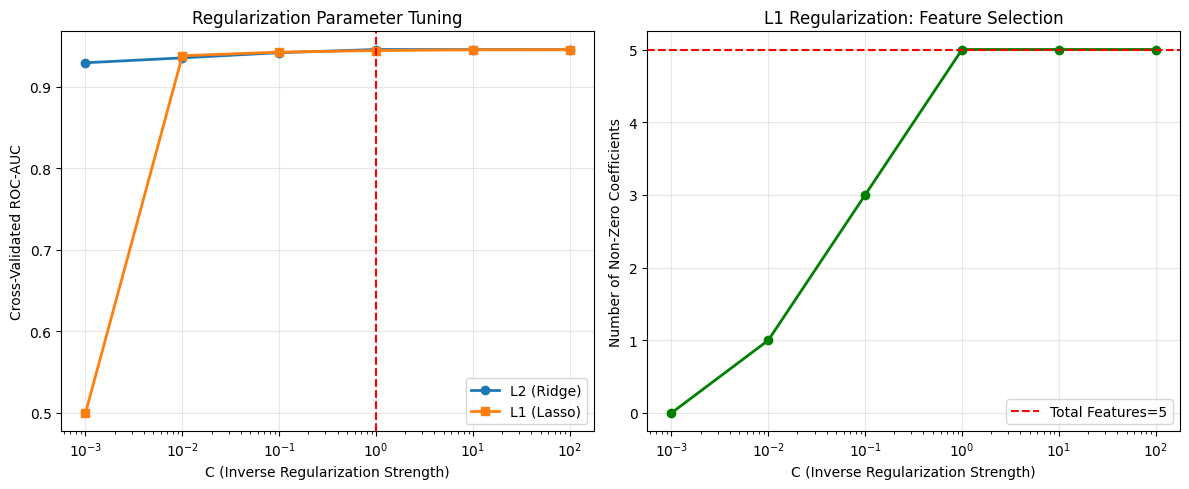


💡 Key Insights:
- Higher C = less regularization = more complex model
- Lower C = more regularization = simpler model
- L1 penalty can set coefficients to exactly 0 (feature selection)
- L2 penalty shrinks all coefficients but keeps them non-zero


In [8]:
# Visualize C parameter effect
results_df = pd.DataFrame(grid_search.cv_results_)

# Filter for L2 penalty
l2_results = results_df[results_df['param_penalty'] == 'l2']
l1_results = results_df[results_df['param_penalty'] == 'l1']

plt.figure(figsize=(12, 5))

# Left: ROC-AUC vs C
plt.subplot(1, 2, 1)
plt.semilogx(l2_results['param_C'], l2_results['mean_test_score'], 
            'o-', linewidth=2, label='L2 (Ridge)')
plt.semilogx(l1_results['param_C'], l1_results['mean_test_score'], 
            's-', linewidth=2, label='L1 (Lasso)')
plt.xlabel('C (Inverse Regularization Strength)')
plt.ylabel('Cross-Validated ROC-AUC')
plt.title('Regularization Parameter Tuning')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axvline(grid_search.best_params_['C'], color='r', linestyle='--',
           label=f"Best C={grid_search.best_params_['C']}")

# Right: Number of non-zero coefficients (for L1)
plt.subplot(1, 2, 2)
c_values = [0.001, 0.01, 0.1, 1, 10, 100]
n_nonzero = []

for c in c_values:
    model_temp = LogisticRegression(C=c, penalty='l1', solver='liblinear', random_state=42)
    model_temp.fit(X_train_scaled, y_train)
    n_nonzero.append(np.sum(model_temp.coef_[0] != 0))

plt.semilogx(c_values, n_nonzero, 'o-', linewidth=2, color='green')
plt.xlabel('C (Inverse Regularization Strength)')
plt.ylabel('Number of Non-Zero Coefficients')
plt.title('L1 Regularization: Feature Selection')
plt.grid(True, alpha=0.3)
plt.axhline(y=X_train.shape[1], color='r', linestyle='--', label=f'Total Features={X_train.shape[1]}')
plt.legend()

plt.tight_layout()
plt.show()

print("\n💡 Key Insights:")
print("- Higher C = less regularization = more complex model")
print("- Lower C = more regularization = simpler model")
print("- L1 penalty can set coefficients to exactly 0 (feature selection)")
print("- L2 penalty shrinks all coefficients but keeps them non-zero")


---

## 8. Complete Hyperparameter Reference

### Logistic Regression Parameters

#### `C` (float, default=1.0) **[MOST IMPORTANT]**
- **Description**: Inverse of regularization strength (smaller = stronger regularization)
- **Effect on Model**:
  - **High C** (e.g., 10, 100): Weak regularization
    - More complex model
    - May overfit
    - Closer to unregularized logistic regression
  - **Low C** (e.g., 0.01, 0.1): Strong regularization
    - Simpler model
    - Prevents overfitting
    - May underfit
- **Typical Range**: [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
- **Tuning Strategy**:
  1. Start with C=1.0
  2. Try logarithmic scale: 0.001, 0.01, 0.1, 1, 10, 100
  3. Use GridSearchCV with cross-validation
  4. Monitor train vs validation performance
- **Example**: `LogisticRegression(C=10.0)`

---

#### `penalty` (str, default='l2')
- **Options**: 'l1', 'l2', 'elasticnet', 'none'
- **Description**: Type of regularization
- **Effect**:
  - **'l2' (Ridge)**: Shrinks all coefficients, keeps all features
    - Default and most common
    - Works well in most cases
  - **'l1' (Lasso)**: Can set coefficients to 0 (feature selection)
    - Produces sparse models
    - Good for high-dimensional data
    - Requires solver='liblinear' or 'saga'
  - **'elasticnet'**: Combination of L1 and L2
    - Requires solver='saga'
    - Need to set `l1_ratio` parameter
  - **'none'**: No regularization
    - Can overfit easily
    - Use with caution
- **Example**: `LogisticRegression(penalty='l1', solver='liblinear')`

---

#### `solver` (str, default='lbfgs')
- **Options**: 'lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga'
- **Description**: Optimization algorithm
- **When to use each**:
  - **'lbfgs'**: Default, good for small-medium datasets
    - Supports only L2 and none penalties
    - Memory efficient
    - Handles multiclass well
  - **'liblinear'**: Good for small datasets
    - Supports L1 and L2
    - Does not support multiclass (one-vs-rest only)
  - **'sag'**: Fast for large datasets
    - Requires scaled features
    - Supports L2 and none
  - **'saga'**: Fast for large datasets
    - Supports all penalties including elasticnet
    - Requires scaled features
  - **'newton-cg'**: Good for small datasets
    - Supports L2 and none
- **Example**: `LogisticRegression(penalty='l1', solver='saga')`

---

#### `max_iter` (int, default=100)
- **Description**: Maximum iterations for solver to converge
- **Effect**: More iterations = more time but better convergence
- **When to increase**: 
  - See convergence warnings
  - Complex datasets
  - Small learning rates (for saga/sag)
- **Typical Range**: 100 to 10000
- **Example**: `LogisticRegression(max_iter=1000)`

---

#### `class_weight` (dict or 'balanced', default=None)
- **Description**: Weights for each class
- **Effect**: Handles imbalanced datasets
- **Options**:
  - **None**: All classes have weight 1
  - **'balanced'**: Automatically adjusts weights inversely proportional to class frequencies
  - **dict**: Manual weights like {0: 1, 1: 3}
- **When to use**: Imbalanced datasets (e.g., 90% class 0, 10% class 1)
- **Example**: `LogisticRegression(class_weight='balanced')`

---

#### `random_state` (int, default=None)
- **Description**: Seed for random number generator
- **Effect**: Ensures reproducibility
- **Use**: Always set for reproducible results
- **Example**: `LogisticRegression(random_state=42)`

---

#### `multi_class` (str, default='auto')
- **Options**: 'auto', 'ovr', 'multinomial'
- **Description**: Strategy for multiclass classification
- **Effect**:
  - **'ovr' (one-vs-rest)**: Fits one classifier per class
  - **'multinomial'**: Minimizes multinomial loss
  - **'auto'**: Selects automatically
- **Example**: `LogisticRegression(multi_class='multinomial')`

---

#### `warm_start` (bool, default=False)
- **Description**: Reuse previous fit as initialization
- **When to use**: Fitting multiple models with similar parameters
- **Example**: `LogisticRegression(warm_start=True)`

---

#### `tol` (float, default=1e-4)
- **Description**: Tolerance for stopping criteria
- **Effect**: Lower = more precise (but slower)
- **Example**: `LogisticRegression(tol=1e-5)`

---

### Parameter Combinations Guide

#### For Standard Binary Classification:
```python
LogisticRegression(C=1.0, penalty='l2', solver='lbfgs', max_iter=1000, random_state=42)
```

#### For Feature Selection:
```python
LogisticRegression(C=0.1, penalty='l1', solver='liblinear', max_iter=1000, random_state=42)
```

#### For Large Datasets:
```python
LogisticRegression(C=1.0, penalty='l2', solver='saga', max_iter=100, random_state=42)
```

#### For Imbalanced Data:
```python
LogisticRegression(C=1.0, class_weight='balanced', max_iter=1000, random_state=42)
```

#### For Multiclass Classification:
```python
LogisticRegression(C=1.0, multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
```


---

## 9. Practical Tips & Common Pitfalls

### ✅ Best Practices

#### 1. **Always Scale Features**
Logistic Regression is sensitive to feature scales (especially with regularization).

```python
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
```

**Why**: Features on different scales can dominate the regularization.

---

#### 2. **Check Class Imbalance**
```python
# Check class distribution
print(np.bincount(y_train))
print(f"Class 0: {sum(y_train==0)/len(y_train):.1%}")
print(f"Class 1: {sum(y_train==1)/len(y_train):.1%}")

# If imbalanced (e.g., 90:10), use class_weight
model = LogisticRegression(class_weight='balanced')
```

---

#### 3. **Use Appropriate Metrics**
Don't rely on accuracy alone for imbalanced data!

```python
from sklearn.metrics import classification_report, roc_auc_score

# For imbalanced data, use:
print(classification_report(y_test, y_pred))
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba)}")
print(f"F1-Score: {f1_score(y_test, y_pred)}")
```

---

#### 4. **Adjust Decision Threshold**
Default threshold is 0.5, but you can optimize it:

```python
from sklearn.metrics import precision_recall_curve

# Find optimal threshold
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
f1_scores = 2 * (precision * recall) / (precision + recall)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]

# Use custom threshold
y_pred_custom = (y_proba >= optimal_threshold).astype(int)
```

---

#### 5. **Cross-Validation for Hyperparameters**
```python
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='roc_auc')
print(f"CV ROC-AUC: {scores.mean():.3f} (+/- {scores.std():.3f})")
```

---

#### 6. **Handle Multicollinearity**
```python
# Check correlation
import pandas as pd
correlation_matrix = pd.DataFrame(X_train).corr()
high_corr = (correlation_matrix.abs() > 0.8) & (correlation_matrix != 1.0)

# Use L2 regularization to handle it
model = LogisticRegression(penalty='l2', C=1.0)
```

---

### ❌ Common Mistakes

#### 1. **Not Scaling Features**
**Bad**:
```python
# Feature 1: [1-10], Feature 2: [1000-10000]
model = LogisticRegression()
model.fit(X, y)  # Regularization affects features unequally!
```

**Good**:
```python
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
model = LogisticRegression()
model.fit(X_scaled, y)
```

---

#### 2. **Using Accuracy for Imbalanced Data**
**Bad**:
```python
# 95% class 0, 5% class 1
accuracy = model.score(X_test, y_test)  # Could be 95% by predicting all 0!
```

**Good**:
```python
# Use multiple metrics
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1: {f1_score(y_test, y_pred)}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba)}")
```

---

#### 3. **Ignoring Convergence Warnings**
```python
# If you see "ConvergenceWarning: lbfgs failed to converge"
# Solution 1: Increase max_iter
model = LogisticRegression(max_iter=1000)

# Solution 2: Scale your data
X_scaled = StandardScaler().fit_transform(X)

# Solution 3: Try different solver
model = LogisticRegression(solver='saga')
```

---

#### 4. **Wrong Solver-Penalty Combination**
**Bad**:
```python
# lbfgs doesn't support L1!
model = LogisticRegression(penalty='l1', solver='lbfgs')  # Error!
```

**Good**:
```python
# Use compatible combination
model = LogisticRegression(penalty='l1', solver='liblinear')
```

**Compatibility Matrix**:
| Penalty | Compatible Solvers |
|---------|-------------------|
| l1 | liblinear, saga |
| l2 | all |
| elasticnet | saga |
| none | lbfgs, newton-cg, sag, saga |

---

#### 5. **Not Checking for Perfect Separation**
If one feature perfectly separates classes, logistic regression fails (coefficients → ∞).

**Solution**: Use regularization or remove the perfect predictor.

---

#### 6. **Treating Probabilities as Calibrated**
Logistic regression probabilities aren't always well-calibrated.

```python
# For better calibration
from sklearn.calibration import CalibratedClassifierCV

calibrated = CalibratedClassifierCV(model, cv=5)
calibrated.fit(X_train, y_train)
calibrated_proba = calibrated.predict_proba(X_test)
```

---

### Performance Optimization

#### Computational Complexity
- **Training**: O(n × m × k) where n=samples, m=features, k=iterations
- **Prediction**: O(m) per sample - very fast!

#### Memory Requirements
- Stores coefficient vector: O(m)
- Very memory efficient

#### For Large Datasets
```python
# Use 'saga' or 'sag' solver
model = LogisticRegression(solver='saga', max_iter=100)

# Or use SGDClassifier
from sklearn.linear_model import SGDClassifier
model = SGDClassifier(loss='log', max_iter=1000)
model.partial_fit(X_batch, y_batch, classes=[0, 1])  # Mini-batch training
```

---

### Debugging Tips

#### Model Not Learning?
1. **Check if features are scaled**
2. **Try different learning rate** (if using SGD)
3. **Increase max_iter**
4. **Check for data leakage**
5. **Verify classes are encoded as 0/1**

#### Poor Performance?
1. **Check class imbalance** → use class_weight
2. **Check feature relevance** → try L1 penalty
3. **Add polynomial features** → for non-linear patterns
4. **Check for outliers** → can affect decision boundary
5. **Try different threshold** → optimize for your metric


---

## 10. Real-world Example: Credit Card Fraud Detection

Let's apply Logistic Regression to a realistic imbalanced classification problem.


In [9]:
# Simulate credit card fraud detection dataset
# Create imbalanced dataset (fraud is rare)
np.random.seed(42)

from sklearn.datasets import make_classification

X_fraud, y_fraud = make_classification(
    n_samples=10000,
    n_features=20,
    n_informative=15,
    n_redundant=5,
    n_classes=2,
    weights=[0.97, 0.03],  # 97% legitimate, 3% fraud
    flip_y=0.01,
    random_state=42
)

# Split data
X_train_fraud, X_test_fraud, y_train_fraud, y_test_fraud = train_test_split(
    X_fraud, y_fraud, test_size=0.3, random_state=42, stratify=y_fraud
)

# Scale features
scaler_fraud = StandardScaler()
X_train_fraud_scaled = scaler_fraud.fit_transform(X_train_fraud)
X_test_fraud_scaled = scaler_fraud.transform(X_test_fraud)

print("=" * 60)
print("REAL-WORLD EXAMPLE: CREDIT CARD FRAUD DETECTION")
print("=" * 60)
print(f"\n📊 Dataset Statistics:")
print(f"  Total samples: {len(y_fraud)}")
print(f"  Training samples: {len(y_train_fraud)}")
print(f"  Test samples: {len(y_test_fraud)}")
print(f"  Features: {X_fraud.shape[1]}")

print(f"\n⚖️ Class Distribution (Training):")
train_counts = np.bincount(y_train_fraud)
print(f"  Legitimate (0): {train_counts[0]} ({train_counts[0]/len(y_train_fraud):.1%})")
print(f"  Fraud (1): {train_counts[1]} ({train_counts[1]/len(y_train_fraud):.1%})")
print(f"  Imbalance Ratio: {train_counts[0]/train_counts[1]:.1f}:1")


REAL-WORLD EXAMPLE: CREDIT CARD FRAUD DETECTION

📊 Dataset Statistics:
  Total samples: 10000
  Training samples: 7000
  Test samples: 3000
  Features: 20

⚖️ Class Distribution (Training):
  Legitimate (0): 6762 (96.6%)
  Fraud (1): 238 (3.4%)
  Imbalance Ratio: 28.4:1


In [10]:
# Compare models: without and with class balancing
print("\n" + "=" * 60)
print("MODEL COMPARISON")
print("=" * 60)

models = {
    'Baseline (No Balancing)': LogisticRegression(random_state=42, max_iter=1000),
    'Balanced Class Weights': LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000),
    'Custom Weights (1:10)': LogisticRegression(class_weight={0: 1, 1: 10}, random_state=42, max_iter=1000),
    'L1 Regularization': LogisticRegression(penalty='l1', solver='liblinear', class_weight='balanced', random_state=42)
}

results_fraud = []

for name, model in models.items():
    # Train
    model.fit(X_train_fraud_scaled, y_train_fraud)
    
    # Predict
    y_pred = model.predict(X_test_fraud_scaled)
    y_proba = model.predict_proba(X_test_fraud_scaled)[:, 1]
    
    # Metrics
    acc = accuracy_score(y_test_fraud, y_pred)
    prec = precision_score(y_test_fraud, y_pred)
    rec = recall_score(y_test_fraud, y_pred)
    f1 = f1_score(y_test_fraud, y_pred)
    roc = roc_auc_score(y_test_fraud, y_proba)
    
    results_fraud.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1,
        'ROC-AUC': roc
    })
    
    print(f"\n{name}:")
    print(f"  Accuracy:  {acc:.4f}")
    print(f"  Precision: {prec:.4f} (of predicted frauds, how many are actual frauds)")
    print(f"  Recall:    {rec:.4f} (of actual frauds, how many did we catch)")
    print(f"  F1-Score:  {f1:.4f}")
    print(f"  ROC-AUC:   {roc:.4f}")

# Create comparison dataframe
results_fraud_df = pd.DataFrame(results_fraud)
print("\n" + "=" * 60)
print("SUMMARY TABLE")
print("=" * 60)
print(results_fraud_df.to_string(index=False))



MODEL COMPARISON

Baseline (No Balancing):
  Accuracy:  0.9787
  Precision: 1.0000 (of predicted frauds, how many are actual frauds)
  Recall:    0.3725 (of actual frauds, how many did we catch)
  F1-Score:  0.5429
  ROC-AUC:   0.8461

Balanced Class Weights:
  Accuracy:  0.8127
  Precision: 0.1266 (of predicted frauds, how many are actual frauds)
  Recall:    0.7647 (of actual frauds, how many did we catch)
  F1-Score:  0.2173
  ROC-AUC:   0.8550

Custom Weights (1:10):
  Accuracy:  0.9490
  Precision: 0.3622 (of predicted frauds, how many are actual frauds)
  Recall:    0.6569 (of actual frauds, how many did we catch)
  F1-Score:  0.4669
  ROC-AUC:   0.8543

L1 Regularization:
  Accuracy:  0.8117
  Precision: 0.1260 (of predicted frauds, how many are actual frauds)
  Recall:    0.7647 (of actual frauds, how many did we catch)
  F1-Score:  0.2164
  ROC-AUC:   0.8549

SUMMARY TABLE
                  Model  Accuracy  Precision   Recall  F1-Score  ROC-AUC
Baseline (No Balancing)  0.9786

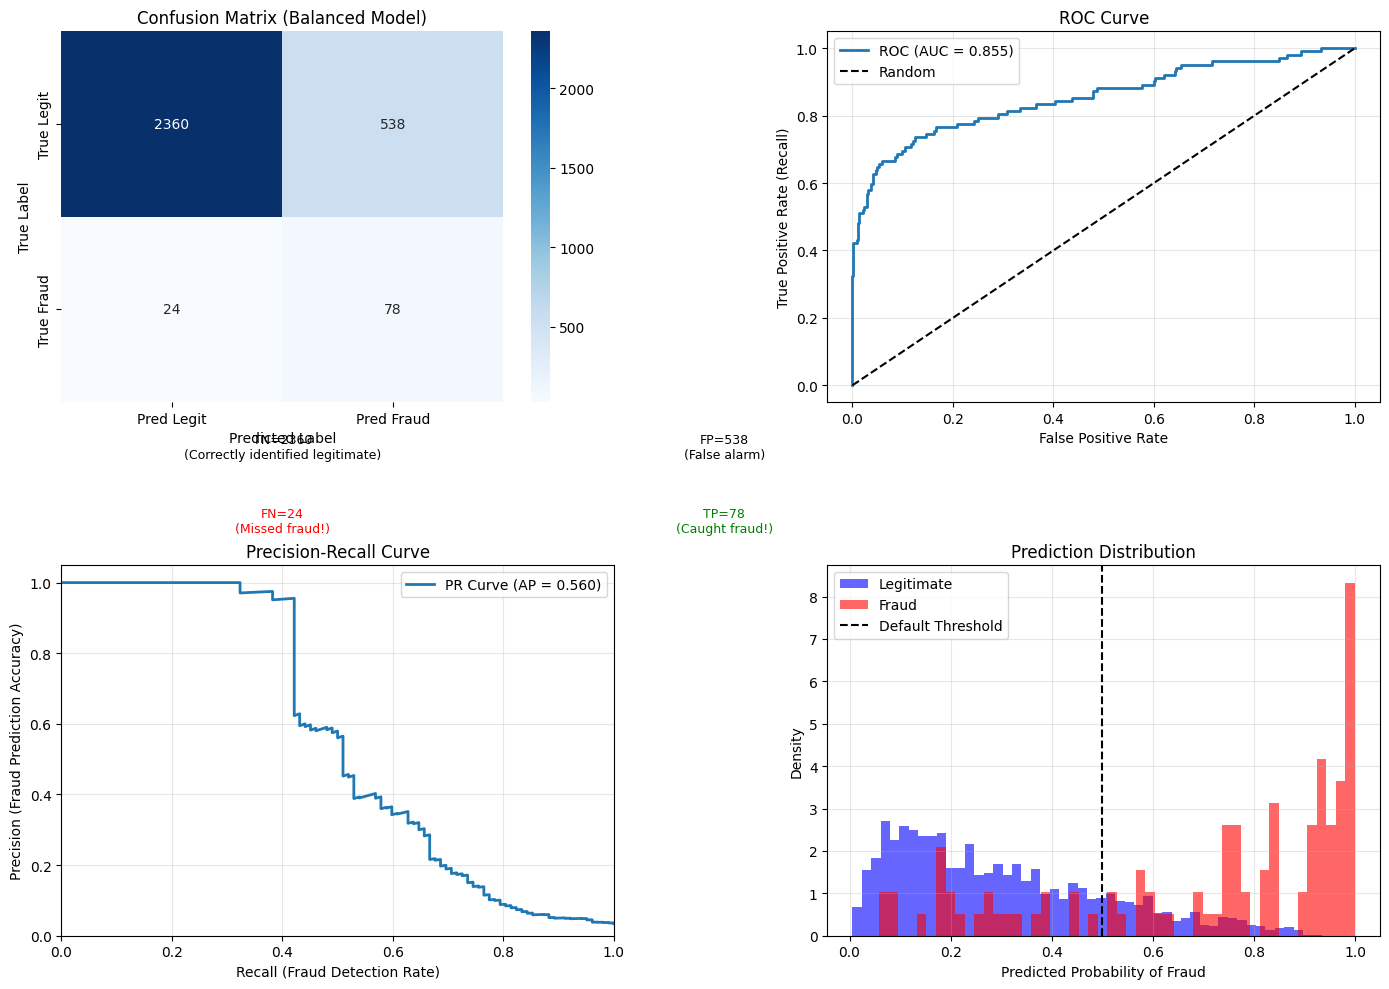


💡 Business Insights:
  • Caught 78 out of 102 frauds (76.5% recall)
  • 538 false alarms out of 2898 legitimate transactions
  • For every fraud caught, we flag 6.9 legitimate transactions
  • Cost-benefit analysis needed: Cost of missed fraud vs false alarm


In [11]:
# Visualize results for best model
best_model_fraud = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
best_model_fraud.fit(X_train_fraud_scaled, y_train_fraud)

y_pred_best_fraud = best_model_fraud.predict(X_test_fraud_scaled)
y_proba_best_fraud = best_model_fraud.predict_proba(X_test_fraud_scaled)[:, 1]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Confusion Matrix
cm_fraud = confusion_matrix(y_test_fraud, y_pred_best_fraud)
sns.heatmap(cm_fraud, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0],
            xticklabels=['Pred Legit', 'Pred Fraud'],
            yticklabels=['True Legit', 'True Fraud'])
axes[0, 0].set_title('Confusion Matrix (Balanced Model)')
axes[0, 0].set_ylabel('True Label')
axes[0, 0].set_xlabel('Predicted Label')

# Add counts
tn, fp, fn, tp = cm_fraud.ravel()
axes[0, 0].text(0.5, -0.15, f'TN={tn}\n(Correctly identified legitimate)', 
               ha='center', transform=axes[0, 0].transAxes, fontsize=9)
axes[0, 0].text(1.5, -0.15, f'FP={fp}\n(False alarm)', 
               ha='center', transform=axes[0, 0].transAxes, fontsize=9)
axes[0, 0].text(0.5, -0.35, f'FN={fn}\n(Missed fraud!)', 
               ha='center', transform=axes[0, 0].transAxes, fontsize=9, color='red')
axes[0, 0].text(1.5, -0.35, f'TP={tp}\n(Caught fraud!)', 
               ha='center', transform=axes[0, 0].transAxes, fontsize=9, color='green')

# 2. ROC Curve
fpr_fraud, tpr_fraud, _ = roc_curve(y_test_fraud, y_proba_best_fraud)
roc_auc_fraud = roc_auc_score(y_test_fraud, y_proba_best_fraud)

axes[0, 1].plot(fpr_fraud, tpr_fraud, linewidth=2, label=f'ROC (AUC = {roc_auc_fraud:.3f})')
axes[0, 1].plot([0, 1], [0, 1], 'k--', label='Random')
axes[0, 1].set_xlabel('False Positive Rate')
axes[0, 1].set_ylabel('True Positive Rate (Recall)')
axes[0, 1].set_title('ROC Curve')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Precision-Recall Curve
from sklearn.metrics import precision_recall_curve, average_precision_score

precision_fraud, recall_fraud, thresholds_pr = precision_recall_curve(y_test_fraud, y_proba_best_fraud)
avg_precision = average_precision_score(y_test_fraud, y_proba_best_fraud)

axes[1, 0].plot(recall_fraud, precision_fraud, linewidth=2, 
               label=f'PR Curve (AP = {avg_precision:.3f})')
axes[1, 0].set_xlabel('Recall (Fraud Detection Rate)')
axes[1, 0].set_ylabel('Precision (Fraud Prediction Accuracy)')
axes[1, 0].set_title('Precision-Recall Curve')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_xlim([0, 1])
axes[1, 0].set_ylim([0, 1.05])

# 4. Probability Distribution
axes[1, 1].hist(y_proba_best_fraud[y_test_fraud==0], bins=50, alpha=0.6, 
               label='Legitimate', color='blue', density=True)
axes[1, 1].hist(y_proba_best_fraud[y_test_fraud==1], bins=50, alpha=0.6, 
               label='Fraud', color='red', density=True)
axes[1, 1].axvline(x=0.5, color='black', linestyle='--', label='Default Threshold')
axes[1, 1].set_xlabel('Predicted Probability of Fraud')
axes[1, 1].set_ylabel('Density')
axes[1, 1].set_title('Prediction Distribution')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 Business Insights:")
print(f"  • Caught {tp} out of {tp + fn} frauds ({tp/(tp+fn):.1%} recall)")
print(f"  • {fp} false alarms out of {fp + tn} legitimate transactions")
print(f"  • For every fraud caught, we flag {fp/tp:.1f} legitimate transactions")
print(f"  • Cost-benefit analysis needed: Cost of missed fraud vs false alarm")


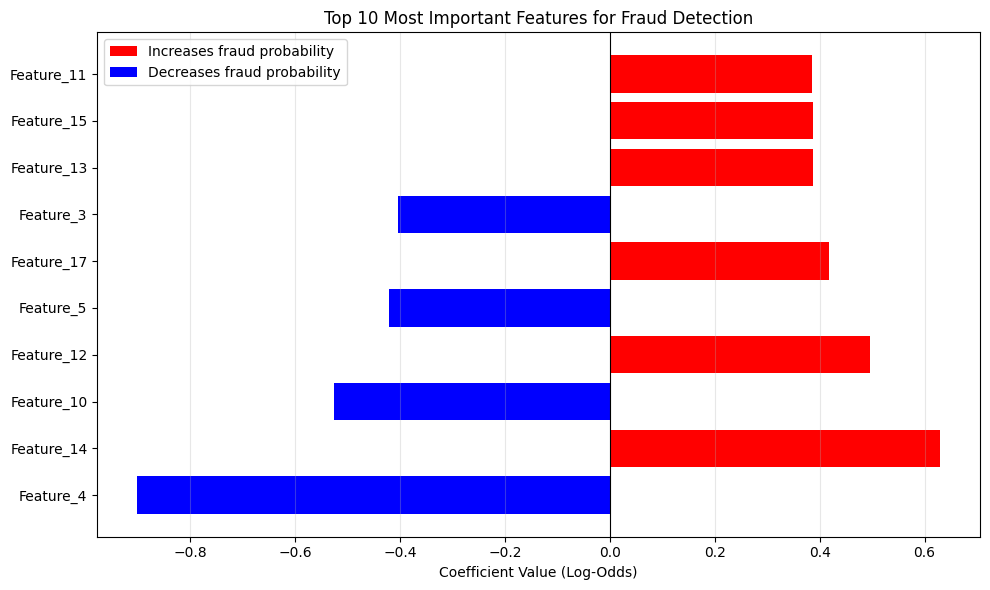


🔍 Top 5 Fraud Indicators:
  • Feature_4: ↓ DECREASES fraud probability (coef: -0.9011)
  • Feature_14: ↑ INCREASES fraud probability (coef: 0.6292)
  • Feature_10: ↓ DECREASES fraud probability (coef: -0.5251)
  • Feature_12: ↑ INCREASES fraud probability (coef: 0.4957)
  • Feature_5: ↓ DECREASES fraud probability (coef: -0.4212)


In [12]:
# Feature Importance Analysis
feature_importance_fraud = pd.DataFrame({
    'Feature': [f'Feature_{i}' for i in range(X_fraud.shape[1])],
    'Coefficient': best_model_fraud.coef_[0],
    'Abs_Coefficient': np.abs(best_model_fraud.coef_[0])
}).sort_values('Abs_Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
top_n = 10
top_features = feature_importance_fraud.head(top_n)

colors = ['red' if x > 0 else 'blue' for x in top_features['Coefficient']]
plt.barh(range(top_n), top_features['Coefficient'], color=colors)
plt.yticks(range(top_n), top_features['Feature'])
plt.xlabel('Coefficient Value (Log-Odds)')
plt.title(f'Top {top_n} Most Important Features for Fraud Detection')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
plt.grid(True, alpha=0.3, axis='x')

# Add legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='red', label='Increases fraud probability'),
    Patch(facecolor='blue', label='Decreases fraud probability')
]
plt.legend(handles=legend_elements)

plt.tight_layout()
plt.show()

print("\n🔍 Top 5 Fraud Indicators:")
for idx, row in feature_importance_fraud.head(5).iterrows():
    direction = "↑ INCREASES" if row['Coefficient'] > 0 else "↓ DECREASES"
    print(f"  • {row['Feature']}: {direction} fraud probability (coef: {row['Coefficient']:.4f})")


---

## 11. Comparison with Other Algorithms

### When to Choose Logistic Regression vs Alternatives

| Aspect | Logistic Regression | Decision Trees | Random Forest | SVM (RBF) | Neural Networks |
|--------|---------------------|----------------|---------------|-----------|-----------------|
| **Interpretability** | ⭐⭐⭐⭐⭐ | ⭐⭐⭐⭐ | ⭐⭐ | ⭐ | ⭐ |
| **Training Speed** | ⭐⭐⭐⭐⭐ | ⭐⭐⭐⭐ | ⭐⭐⭐ | ⭐⭐ | ⭐⭐ |
| **Prediction Speed** | ⭐⭐⭐⭐⭐ | ⭐⭐⭐⭐⭐ | ⭐⭐⭐⭐ | ⭐⭐⭐ | ⭐⭐⭐ |
| **Linear Boundaries** | ⭐⭐⭐⭐⭐ | ⭐⭐ | ⭐⭐ | ⭐ | ⭐⭐ |
| **Non-linear Boundaries** | ⭐ | ⭐⭐⭐⭐ | ⭐⭐⭐⭐⭐ | ⭐⭐⭐⭐⭐ | ⭐⭐⭐⭐⭐ |
| **Probability Estimates** | ⭐⭐⭐⭐⭐ | ⭐⭐⭐ | ⭐⭐⭐⭐ | ⭐⭐⭐ | ⭐⭐⭐⭐ |
| **Handles Imbalance** | ⭐⭐⭐ | ⭐⭐⭐ | ⭐⭐⭐ | ⭐⭐⭐⭐ | ⭐⭐⭐ |
| **Feature Scaling Needed** | ✅ Yes | ❌ No | ❌ No | ✅ Yes | ✅ Yes |
| **Small Data (<1000)** | ⭐⭐⭐⭐⭐ | ⭐⭐⭐⭐ | ⭐⭐⭐ | ⭐⭐⭐ | ⭐ |
| **Overfitting Risk** | Low | High | Low | Medium | High |

### Practical Comparison Example


In [13]:
# Compare Logistic Regression with other classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import time

print("=" * 60)
print("ALGORITHM COMPARISON ON FRAUD DETECTION")
print("=" * 60)

classifiers = {
    'Logistic Regression': LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(max_depth=10, class_weight='balanced', random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=10, class_weight='balanced', 
                                           random_state=42, n_jobs=-1),
    'Naive Bayes': GaussianNB(),
    'KNN (k=5)': KNeighborsClassifier(n_neighbors=5)
}

comparison_results_fraud = []

for name, clf in classifiers.items():
    # Time training
    start_time = time.time()
    clf.fit(X_train_fraud_scaled, y_train_fraud)
    train_time = time.time() - start_time
    
    # Time prediction
    start_time = time.time()
    y_pred = clf.predict(X_test_fraud_scaled)
    pred_time = time.time() - start_time
    
    # Get probabilities (if available)
    if hasattr(clf, 'predict_proba'):
        y_proba = clf.predict_proba(X_test_fraud_scaled)[:, 1]
        roc_auc = roc_auc_score(y_test_fraud, y_proba)
    else:
        roc_auc = np.nan
    
    # Calculate metrics
    acc = accuracy_score(y_test_fraud, y_pred)
    prec = precision_score(y_test_fraud, y_pred)
    rec = recall_score(y_test_fraud, y_pred)
    f1 = f1_score(y_test_fraud, y_pred)
    
    comparison_results_fraud.append({
        'Algorithm': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1,
        'ROC-AUC': roc_auc,
        'Train Time (s)': train_time,
        'Pred Time (ms)': pred_time * 1000
    })

# Display results
comparison_df_fraud = pd.DataFrame(comparison_results_fraud)
print("\n" + comparison_df_fraud.to_string(index=False))

print("\n" + "=" * 60)
print("💡 Key Insights:")
print("=" * 60)
print("✓ Logistic Regression:")
print("  • Fastest to train and predict")
print("  • Highly interpretable (see feature coefficients)")
print("  • Good probability estimates")
print("  • Works well for linearly separable fraud patterns")
print("\n✓ Decision Tree:")
print("  • Can capture non-linear patterns")
print("  • Very interpretable (can visualize tree)")
print("  • Prone to overfitting without constraints")
print("\n✓ Random Forest:")
print("  • Usually best accuracy")
print("  • Handles non-linear patterns well")
print("  • Less interpretable than Logistic Regression")
print("\n✓ Naive Bayes:")
print("  • Very fast")
print("  • Assumes feature independence (often violated)")
print("\n✓ KNN:")
print("  • Slow for large datasets")
print("  • No training phase (lazy learning)")
print("  • Memory intensive")


ALGORITHM COMPARISON ON FRAUD DETECTION

          Algorithm  Accuracy  Precision   Recall  F1-Score  ROC-AUC  Train Time (s)  Pred Time (ms)
Logistic Regression  0.812667   0.126623 0.764706  0.217270 0.855001        0.015454        0.000000
      Decision Tree  0.930000   0.250000 0.529412  0.339623 0.729411        0.103560       13.414860
      Random Forest  0.974333   0.962963 0.254902  0.403101 0.904464        0.357511       29.531479
        Naive Bayes  0.972000   0.950000 0.186275  0.311475 0.829186        0.000000        0.000000
          KNN (k=5)  0.978667   1.000000 0.372549  0.542857 0.831243        0.000000     3522.392750

💡 Key Insights:
✓ Logistic Regression:
  • Fastest to train and predict
  • Highly interpretable (see feature coefficients)
  • Good probability estimates
  • Works well for linearly separable fraud patterns

✓ Decision Tree:
  • Can capture non-linear patterns
  • Very interpretable (can visualize tree)
  • Prone to overfitting without constraints



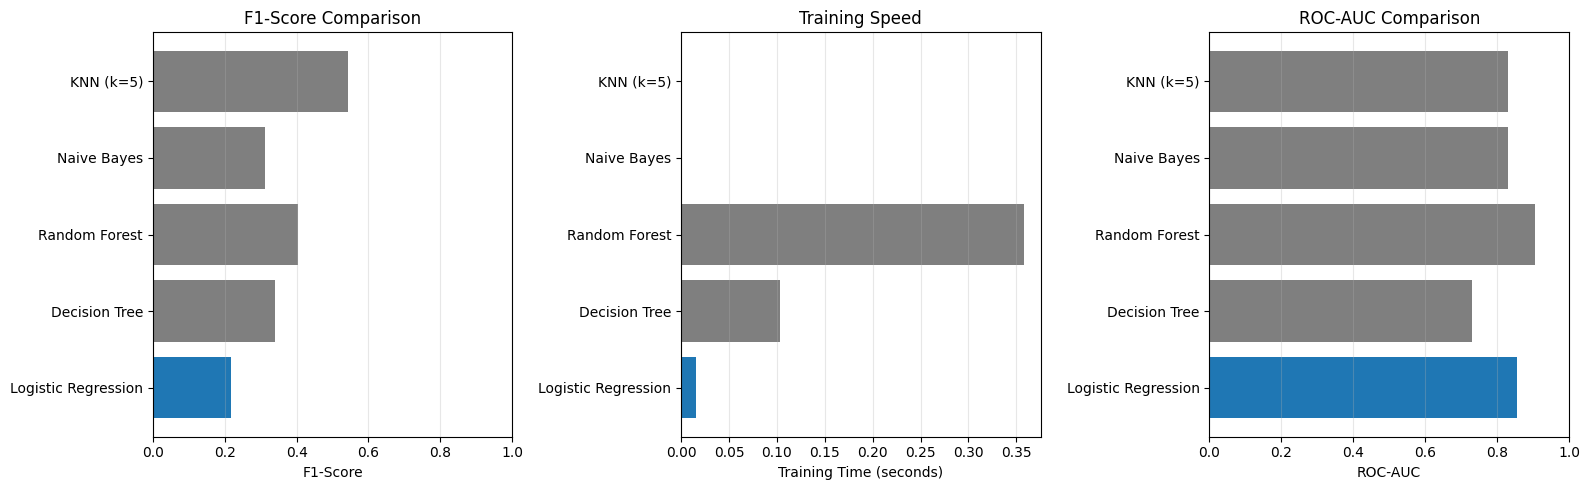

In [14]:
# Visualize comparison
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# 1. F1-Score Comparison
algorithms = comparison_df_fraud['Algorithm']
f1_scores = comparison_df_fraud['F1-Score']
colors_alg = ['#1f77b4' if 'Logistic' in alg else '#7f7f7f' for alg in algorithms]

axes[0].barh(algorithms, f1_scores, color=colors_alg)
axes[0].set_xlabel('F1-Score')
axes[0].set_title('F1-Score Comparison')
axes[0].grid(True, alpha=0.3, axis='x')
axes[0].set_xlim([0, 1])

# 2. Training Speed
train_times = comparison_df_fraud['Train Time (s)']
axes[1].barh(algorithms, train_times, color=colors_alg)
axes[1].set_xlabel('Training Time (seconds)')
axes[1].set_title('Training Speed')
axes[1].grid(True, alpha=0.3, axis='x')

# 3. ROC-AUC Comparison
roc_aucs = comparison_df_fraud['ROC-AUC'].fillna(0)
axes[2].barh(algorithms, roc_aucs, color=colors_alg)
axes[2].set_xlabel('ROC-AUC')
axes[2].set_title('ROC-AUC Comparison')
axes[2].grid(True, alpha=0.3, axis='x')
axes[2].set_xlim([0, 1])

plt.tight_layout()
plt.show()


---

## 12. References

### 📚 Academic Papers & Books

1. **Original Work**:
   - Cox, D. R. (1958). "The Regression Analysis of Binary Sequences"
   - Berkson, J. (1944). "Application of the Logistic Function to Bio-Assay"

2. **Modern Textbooks**:
   - Hastie, T., Tibshirani, R., & Friedman, J. (2009). *The Elements of Statistical Learning* (Chapter 4)
   - James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). *An Introduction to Statistical Learning* (Chapter 4)
   - Bishop, C. M. (2006). *Pattern Recognition and Machine Learning* (Chapter 4.3)

3. **Regularization**:
   - Ng, A. Y. (2004). "Feature Selection, L1 vs. L2 Regularization, and Rotational Invariance"
   - Zou, H., & Hastie, T. (2005). "Regularization and Variable Selection via the Elastic Net"

### 🌐 Online Resources

- [Scikit-learn Logistic Regression Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
- [StatQuest: Logistic Regression](https://www.youtube.com/watch?v=yIYKR4sgzI8)
- [Andrew Ng's ML Course: Classification](https://www.coursera.org/learn/machine-learning)
- [Logistic Regression Explained (Towards Data Science)](https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc)

### 📊 Key Concepts to Master

- **Sigmoid Function**: Squashes any value to probability (0-1)
- **Binary Cross-Entropy**: Cost function for classification
- **Decision Boundary**: Where P(y=1|x) = 0.5
- **Log-Odds (Logit)**: Natural log of odds ratio
- **Regularization**: L1 (Lasso) and L2 (Ridge) for preventing overfitting
- **Class Imbalance**: Handling rare events with class weights
- **Calibration**: Ensuring probabilities are meaningful

### 🔗 Related Notebooks in this Repository

- `01_linear_regression.ipynb` - Regression version (continuous output)
- `03_decision_trees.ipynb` - Non-linear classification alternative
- `04_random_forest.ipynb` - Ensemble classification
- `05_support_vector_machines.ipynb` - Maximum margin classifier
- `06_naive_bayes.ipynb` - Probabilistic classifier

### 📈 Evaluation Metrics for Classification

**For Balanced Data:**
- Accuracy
- F1-Score
- ROC-AUC

**For Imbalanced Data:**
- Precision (avoid false positives)
- Recall (catch all positives)
- F1-Score (balance both)
- ROC-AUC (threshold-independent)
- Precision-Recall AUC

**Cost-Sensitive:**
- Define business costs for FP and FN
- Optimize custom threshold
- Use class weights

---

## Summary & Key Takeaways

### What We Learned

1. **Theory**: Logistic regression uses sigmoid to map linear combinations to probabilities
2. **Math**: Binary cross-entropy loss, gradient descent optimization
3. **Assumptions**: Binary outcome, independence, linear log-odds relationship
4. **Implementation**: Built from scratch with gradient descent and used scikit-learn
5. **Regularization**: L1 (feature selection) and L2 (shrinkage) via C parameter
6. **Tuning**: C, penalty, solver, class_weight are key hyperparameters
7. **Practice**: Applied to imbalanced fraud detection with proper evaluation

### When to Use Logistic Regression

✅ **Use when**:
- Binary classification task
- Need probability estimates
- Interpretability is important
- Linear decision boundary works
- Baseline model for comparison
- Fast training/prediction required

❌ **Avoid when**:
- Non-linear decision boundaries
- Perfect separation exists
- Very high dimensional (unless using L1)
- Multiclass with many classes (computationally expensive)

### Key Differences from Linear Regression

| Aspect | Linear Regression | Logistic Regression |
|--------|-------------------|---------------------|
| **Task** | Regression | Classification |
| **Output** | Continuous | Probability (0-1) |
| **Function** | Linear | Sigmoid(Linear) |
| **Cost** | MSE | Cross-Entropy |
| **Optimization** | Normal Equation or GD | Gradient Descent |
| **Assumptions** | More strict | Fewer assumptions |

### Best Practices Checklist

- ✅ Scale features (especially with regularization)
- ✅ Check for class imbalance (use class_weight if needed)
- ✅ Use multiple metrics (not just accuracy)
- ✅ Cross-validate hyperparameters
- ✅ Check convergence (increase max_iter if needed)
- ✅ Use appropriate solver for your penalty
- ✅ Consider threshold optimization for business needs
- ✅ Interpret coefficients as log-odds ratios

### Next Steps

1. **Practice** with different datasets (medical, finance, marketing)
2. **Try multiclass** classification (one-vs-rest, multinomial)
3. **Experiment** with threshold tuning for different business costs
4. **Combine** with feature engineering (polynomial features, interactions)
5. **Compare** with non-linear classifiers (SVM, Random Forest)
6. **Learn** about calibration for better probability estimates

---

**Congratulations!** You now have a comprehensive understanding of Logistic Regression for classification tasks. 🎉
